## Importing Libraries

In [1]:
# Operating System module for interacting with the operating system
import os

# Module for generating random numbers
import random

# Module for numerical operations
import numpy as np

# OpenCV library for image processing
import cv2

# Python Imaging Library for image processing
from PIL import Image, ImageDraw, ImageFont

# PyTorch library for deep learning
import torch

# Dataset class for creating custom datasets in PyTorch
from torch.utils.data import Dataset

# Module for image transformations
import torchvision.transforms as transforms

# Neural network module in PyTorch
import torch.nn as nn

# Optimization algorithms in PyTorch
import torch.optim as optim

# Function for padding sequences in PyTorch
from torch.nn.utils.rnn import pad_sequence

# Function for saving images in PyTorch
from torchvision.utils import save_image

# Module for plotting graphs and images
import matplotlib.pyplot as plt

# Module for displaying rich content in IPython environments
from IPython.display import clear_output, display, HTML

# Module for encoding and decoding binary data to text
import base64

## Coding the Training Data

In [2]:
# Create the directory for the training dataset
os.makedirs('training_dataset', exist_ok=True)

# Define the number of videos to generate for the dataset
num_videos = 30000

# Define the number of frames per video (1 Second Video)
frames_per_video = 10

# Define the size of each image in the dataset
img_size = (64, 64)

# Define the size of the shapes (Circle)
shape_size = 10

# Define text prompts and corresponding movements for circles
prompts_and_movements = [
    ("circle moving down", "circle", "down"),  # Move circle downward
    ("circle moving left", "circle", "left"),  # Move circle leftward
    ("circle moving right", "circle", "right"),  # Move circle rightward
    ("circle moving diagonally up-right", "circle", "diagonal_up_right"),  # Move circle diagonally up-right
    ("circle moving diagonally down-left", "circle", "diagonal_down_left"),  # Move circle diagonally down-left
    ("circle moving diagonally up-left", "circle", "diagonal_up_left"),  # Move circle diagonally up-left
    ("circle moving diagonally down-right", "circle", "diagonal_down_right"),  # Move circle diagonally down-right
    ("circle rotating clockwise", "circle", "rotate_clockwise"),  # Rotate circle clockwise
    ("circle rotating counter-clockwise", "circle", "rotate_counter_clockwise"),  # Rotate circle counter-clockwise
    ("circle bouncing vertically", "circle", "bounce_vertical"),  # Bounce circle vertically
    ("circle bouncing horizontally", "circle", "bounce_horizontal"),  # Bounce circle horizontally
    ("circle zigzagging vertically", "circle", "zigzag_vertical"),  # Zigzag circle vertically
    ("circle zigzagging horizontally", "circle", "zigzag_horizontal"),  # Zigzag circle horizontally
    ("circle moving up-left", "circle", "up_left"),  # Move circle up-left
    ("circle moving down-right", "circle", "down_right"),  # Move circle down-right
    ("circle moving down-left", "circle", "down_left")  # Move circle down-left
]

# Define a function to create an image with a moving shape
def create_image_with_moving_shape(size, frame_num, shape, direction):
    # Create a new RGB image with the specified size and white background
    img = Image.new('RGB', size, color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    # Calculate the initial position of the shape (center of the image)
    center_x, center_y = size[0] // 2, size[1] // 2

    # Determine the shape position based on the movement direction
    if direction == "down":
        position = (center_x, (center_y + frame_num * 5) % size[1])
    elif direction == "left":
        position = ((center_x - frame_num * 5) % size[0], center_y)
    elif direction == "right":
        position = ((center_x + frame_num * 5) % size[0], center_y)
    elif direction == "diagonal_up_right":
        position = ((center_x + frame_num * 5) % size[0], (center_y - frame_num * 5) % size[1])
    elif direction == "diagonal_down_left":
        position = ((center_x - frame_num * 5) % size[0], (center_y + frame_num * 5) % size[1])
    elif direction == "diagonal_up_left":
        position = ((center_x - frame_num * 5) % size[0], (center_y - frame_num * 5) % size[1])
    elif direction == "diagonal_down_right":
        position = ((center_x + frame_num * 5) % size[0], (center_y + frame_num * 5) % size[1])
    elif direction == "rotate_clockwise":
        img = img.rotate(frame_num * 10, center=(center_x, center_y), fillcolor=(255, 255, 255))
        position = (center_x, center_y)
    elif direction == "rotate_counter_clockwise":
        img = img.rotate(-frame_num * 10, center=(center_x, center_y), fillcolor=(255, 255, 255))
        position = (center_x, center_y)
    elif direction == "bounce_vertical":
        position = (center_x, center_y - abs(frame_num * 5 % size[1] - center_y))
    elif direction == "bounce_horizontal":
        position = (center_x - abs(frame_num * 5 % size[0] - center_x), center_y)
    elif direction == "zigzag_vertical":
        position = (center_x, center_y - frame_num * 5 % size[1] if frame_num % 2 == 0 else center_y + frame_num * 5 % size[1])
    elif direction == "zigzag_horizontal":
        position = (center_x - frame_num * 5 % size[0] if frame_num % 2 == 0 else center_x + frame_num * 5 % size[0], center_y)
    elif direction == "up_left":
        position = ((center_x - frame_num * 5) % size[0], (center_y - frame_num * 5) % size[1])
    elif direction == "down_right":
        position = ((center_x + frame_num * 5) % size[0], (center_y + frame_num * 5) % size[1])
    elif direction == "down_left":
        position = ((center_x - frame_num * 5) % size[0], (center_y + frame_num * 5) % size[1])
    else:
        position = (center_x, center_y)

    # Draw the shape (circle) at the calculated position
    if shape == "circle":
        draw.ellipse([position[0] - shape_size // 2, position[1] - shape_size // 2, position[0] + shape_size // 2, position[1] + shape_size // 2], fill=(0, 0, 255))

    # Return the image as a numpy array
    return np.array(img)

# Generate the dataset
for video_num in range(num_videos):
    prompt, shape, direction = random.choice(prompts_and_movements)
    video_frames = []
    for frame_num in range(frames_per_video):
        img_array = create_image_with_moving_shape(img_size, frame_num, shape, direction)
        video_frames.append(img_array)

    # Save the frames as images in the training dataset directory
    video_dir = os.path.join('training_dataset', f'video_{video_num}')
    os.makedirs(video_dir, exist_ok=True)
    for frame_num, frame in enumerate(video_frames):
        frame_image = Image.fromarray(frame)
        frame_image.save(os.path.join(video_dir, f'frame_{frame_num}.png'))

print("Dataset generation complete.")

Dataset generation complete.


In [3]:
# Iterate over the number of videos to generate
for i in range(num_videos):
    # Randomly choose a prompt and movement from the predefined list
    prompt, shape, direction = random.choice(prompts_and_movements)

    # Create a directory for the current video
    video_dir = f'training_dataset/video_{i}'
    os.makedirs(video_dir, exist_ok=True)

    # Write the chosen prompt to a text file in the video directory
    with open(f'{video_dir}/prompt.txt', 'w') as f:
        f.write(prompt)

    # Generate frames for the current video
    for frame_num in range(frames_per_video):
        # Create an image with a moving shape based on the current frame number, shape, and direction
        img = create_image_with_moving_shape(img_size, frame_num, shape, direction)

        # Save the generated image as a PNG file in the video directory
        cv2.imwrite(f'{video_dir}/frame_{frame_num}.png', img)

## Pre-Processing Our Training Data

In [4]:
# Define a dataset class inheriting from torch.utils.data.Dataset
class TextToVideoDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        # Initialize the dataset with root directory and optional transform
        self.root_dir = root_dir
        self.transform = transform
        # List all subdirectories in the root directory
        self.video_dirs = [os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
        # Initialize lists to store frame paths and corresponding prompts
        self.frame_paths = []
        self.prompts = []

        # Loop through each video directory
        for video_dir in self.video_dirs:
            # List all PNG files in the video directory and store their paths
            frames = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith('.png')]
            self.frame_paths.extend(frames)
            # Read the prompt text file in the video directory and store its content
            with open(os.path.join(video_dir, 'prompt.txt'), 'r') as f:
                prompt = f.read().strip()
            # Repeat the prompt for each frame in the video and store in prompts list
            self.prompts.extend([prompt] * len(frames))

    # Return the total number of samples in the dataset
    def __len__(self):
        return len(self.frame_paths)

    # Retrieve a sample from the dataset given an index
    def __getitem__(self, idx):
        # Get the path of the frame corresponding to the given index
        frame_path = self.frame_paths[idx]
        # Open the image using PIL (Python Imaging Library)
        image = Image.open(frame_path)
        # Get the prompt corresponding to the given index
        prompt = self.prompts[idx]

        # Apply transformation if specified
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and the prompt
        return image, prompt

# Define a set of transformations to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL Image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize image with mean and standard deviation
])

# Load the dataset using the defined transform
dataset = TextToVideoDataset(root_dir='training_dataset', transform=transform)
# Create a dataloader to iterate over the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

## Implementing GAN Architecture

In [5]:
# Define a class for text embedding
class TextEmbedding(nn.Module):
    # Constructor method with vocab_size and embed_size parameters
    def __init__(self, vocab_size, embed_size):
        # Call the superclass constructor
        super(TextEmbedding, self).__init__()
        # Initialize embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_size)

    # Define the forward pass method
    def forward(self, x):
        # Return embedded representation of input
        return self.embedding(x)

class Generator(nn.Module):
    def __init__(self, text_embed_size):
        super(Generator, self).__init__()

        # Fully connected layer that takes noise and text embedding as input
        self.fc1 = nn.Linear(100 + text_embed_size, 256 * 8 * 8)

        # Transposed convolutional layers to upsample the input
        self.deconv1 = nn.ConvTranspose2d(256, 128, 4, 2, 1)
        self.deconv2 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.deconv3 = nn.ConvTranspose2d(64, 3, 4, 2, 1)  # Output has 3 channels for RGB images

        # Activation functions
        self.relu = nn.ReLU(True)  # ReLU activation function
        self.tanh = nn.Tanh()       # Tanh activation function for final output

    def forward(self, noise, text_embed):
        # Concatenate noise and text embedding along the channel dimension
        x = torch.cat((noise, text_embed), dim=1)

        # Fully connected layer followed by reshaping to 4D tensor
        x = self.fc1(x).view(-1, 256, 8, 8)

        # Upsampling through transposed convolution layers with ReLU activation
        x = self.relu(self.deconv1(x))
        x = self.relu(self.deconv2(x))

        # Final layer with Tanh activation to ensure output values are between -1 and 1 (for images)
        x = self.tanh(self.deconv3(x))

        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # Convolutional layers to process input images
        self.conv1 = nn.Conv2d(3, 64, 4, 2, 1)   # 3 input channels (RGB), 64 output channels, kernel size 4x4, stride 2, padding 1
        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1) # 64 input channels, 128 output channels, kernel size 4x4, stride 2, padding 1
        self.conv3 = nn.Conv2d(128, 256, 4, 2, 1) # 128 input channels, 256 output channels, kernel size 4x4, stride 2, padding 1

        # Fully connected layer for classification
        self.fc1 = nn.Linear(256 * 8 * 8, 1)  # Input size 256x8x8 (output size of last convolution), output size 1 (binary classification)

        # Activation functions
        self.leaky_relu = nn.LeakyReLU(0.2, inplace=True)  # Leaky ReLU activation with negative slope 0.2
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for final output (probability)

    def forward(self, input):
        # Pass input through convolutional layers with LeakyReLU activation
        x = self.leaky_relu(self.conv1(input))
        x = self.leaky_relu(self.conv2(x))
        x = self.leaky_relu(self.conv3(x))

        # Flatten the output of convolutional layers
        x = x.view(-1, 256 * 8 * 8)

        # Pass through fully connected layer with Sigmoid activation for binary classification
        x = self.sigmoid(self.fc1(x))

        return x

## Coding Training Parameters

In [6]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a simple vocabulary for text prompts
all_prompts = [prompt for prompt, _, _ in prompts_and_movements]  # Extract all prompts from prompts_and_movements list
vocab = {word: idx for idx, word in enumerate(set(" ".join(all_prompts).split()))}  # Create a vocabulary dictionary where each unique word is assigned an index
vocab_size = len(vocab)  # Size of the vocabulary
embed_size = 10  # Size of the text embedding vector

def encode_text(prompt):
    # Encode a given prompt into a tensor of indices using the vocabulary
    return torch.tensor([vocab[word] for word in prompt.split()])

# Initialize models, loss function, and optimizers
text_embedding = TextEmbedding(vocab_size, embed_size).to(device)  # Initialize TextEmbedding model with vocab_size and embed_size
netG = Generator(embed_size).to(device)  # Initialize Generator model with embed_size
netD = Discriminator().to(device)  # Initialize Discriminator model
criterion = nn.BCELoss().to(device)  # Binary Cross Entropy loss function
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))  # Adam optimizer for Discriminator
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))  # Adam optimizer for Generator

## Training Loop

Epoch [1/13] Loss D: 0.6611, Loss G: 1.7618
Epoch [2/13] Loss D: 0.6137, Loss G: 1.8738
Epoch [3/13] Loss D: 0.5649, Loss G: 1.9473
Epoch [4/13] Loss D: 0.5695, Loss G: 1.9017
Epoch [5/13] Loss D: 0.5685, Loss G: 1.8693
Epoch [6/13] Loss D: 0.5525, Loss G: 1.9013
Epoch [7/13] Loss D: 0.5591, Loss G: 1.8693
Epoch [8/13] Loss D: 0.5752, Loss G: 1.8275
Epoch [9/13] Loss D: 0.5684, Loss G: 1.8439
Epoch [10/13] Loss D: 0.5664, Loss G: 1.8513
Epoch [11/13] Loss D: 0.5737, Loss G: 1.8276
Epoch [12/13] Loss D: 0.5777, Loss G: 1.8077
Epoch [13/13] Loss D: 0.5767, Loss G: 1.8159


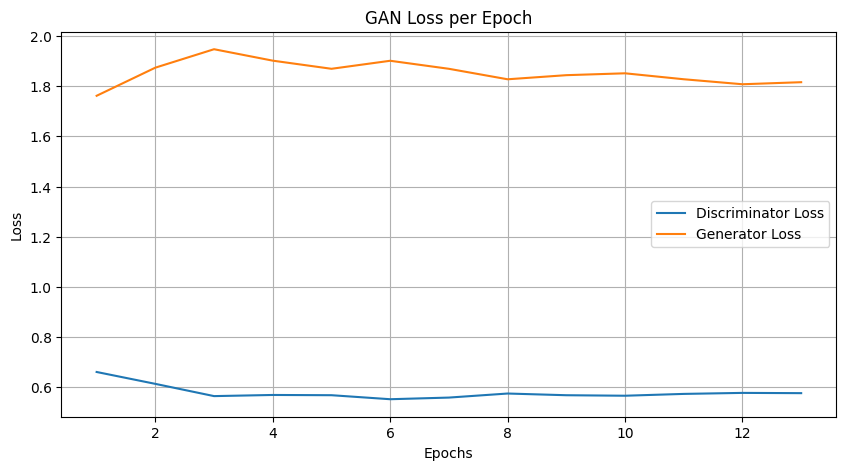

In [8]:
import matplotlib.pyplot as plt

# Number of epochs
num_epochs = 13

# Initialize lists to store losses
lossD_list = []
lossG_list = []

# Training loop
for epoch in range(num_epochs):
    epoch_lossD = 0.0
    epoch_lossG = 0.0

    for i, (data, prompts) in enumerate(dataloader):
        # Move real data to device
        real_data = data.to(device)

        # Convert prompts to list
        prompts = [prompt for prompt in prompts]

        # Update Discriminator
        netD.zero_grad()
        batch_size = real_data.size(0)
        labels_real = torch.ones(batch_size, 1).to(device)
        output_real = netD(real_data)
        lossD_real = criterion(output_real, labels_real)
        lossD_real.backward()

        # Generate fake data
        noise = torch.randn(batch_size, 100).to(device)
        text_embeds = torch.stack([text_embedding(encode_text(prompt).to(device)).mean(dim=0) for prompt in prompts])
        fake_data = netG(noise, text_embeds)
        labels_fake = torch.zeros(batch_size, 1).to(device)
        output_fake = netD(fake_data.detach())
        lossD_fake = criterion(output_fake, labels_fake)
        lossD_fake.backward()
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        labels = torch.ones(batch_size, 1).to(device)
        output = netD(fake_data)
        lossG = criterion(output, labels)
        lossG.backward()
        optimizerG.step()

        # Accumulate losses
        epoch_lossD += (lossD_real + lossD_fake).item()
        epoch_lossG += lossG.item()

    # Calculate average losses for the epoch
    avg_lossD = epoch_lossD / len(dataloader)
    avg_lossG = epoch_lossG / len(dataloader)
    lossD_list.append(avg_lossD)
    lossG_list.append(avg_lossG)

    print(f"Epoch [{epoch + 1}/{num_epochs}] Loss D: {avg_lossD:.4f}, Loss G: {avg_lossG:.4f}")

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), lossD_list, label="Discriminator Loss")
plt.plot(range(1, num_epochs + 1), lossG_list, label="Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


## Saving the Trained Model

In [9]:
torch.save(text_embedding.state_dict(), 'text_embedding.pth')
# Save the Generator model's state dictionary to a file named 'generator.pth'
torch.save(netG.state_dict(), 'generator.pth')
# Save the Discriminator model's state dictionary to a file named 'discriminator.pth'
torch.save(netD.state_dict(), 'discriminator.pth')

In [10]:
# Inference function to generate a video based on a given text prompt
def generate_video(text_prompt, num_frames=10):
    # Create a directory for the generated video frames based on the text prompt
    os.makedirs(f'generated_video_{text_prompt.replace(" ", "_")}', exist_ok=True)

    # Encode the text prompt into a text embedding tensor
    text_embed = text_embedding(encode_text(text_prompt).to(device)).mean(dim=0).unsqueeze(0)

    # Generate frames for the video
    for frame_num in range(num_frames):
        # Generate random noise
        noise = torch.randn(1, 100).to(device)

        # Generate a fake frame using the Generator network
        with torch.no_grad():
            fake_frame = netG(noise, text_embed)

        # Save the generated fake frame as an image file
        save_image(fake_frame, f'generated_video_{text_prompt.replace(" ", "_")}/frame_{frame_num}.png')

# usage of the generate_video function with a specific text prompt
generate_video('circle moving up-right')

In [11]:
# Define the path to your folder containing the PNG frames
folder_path = 'generated_video_circle_moving_up-right'

# Get the list of all PNG files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Sort the images by name (assuming they are numbered sequentially)
image_files.sort()

# Create a list to store the frames
frames = []

# Read each image and append it to the frames list
for image_file in image_files:
  image_path = os.path.join(folder_path, image_file)
  frame = cv2.imread(image_path)
  frames.append(frame)

# Convert the frames list to a numpy array for easier processing
frames = np.array(frames)

# Define the frame rate (frames per second)
fps = 10

# Create a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('generated_video.avi', fourcc, fps, (frames[0].shape[1], frames[0].shape[0]))

# Write each frame to the video
for frame in frames:
  out.write(frame)

# Release the video writer
out.release()